# Configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

from regressors import stats

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)

# Importing Dataset 

In [2]:
std_df = pd.read_csv('processed_dataset/std_dataset.csv', index_col = 0)
std_df.shape

(36733, 39)

In [3]:
dev_df = std_df.loc[:24487]
dev_df.shape

(24488, 39)

In [4]:
eval_df = std_df.loc[24488:]
eval_df.shape

(12245, 39)

In [5]:
ambiental_pred = ['AT', 'AP', 'AH']
process_pred = ['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']
location_pred = ['Austria', 'Belgium', 'Bulgaria', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Republic of Cyprus', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden']
nox = ['NOX']
year = ['YEAR']

# Random Forest

In [30]:
test = []

def include_features(model, df, features_lists, poly = None, target_feature = 'CO'):
    
    scores = {}
    
    
    for features in features_lists:
        X = df.drop(columns = 'CO')
        y = df['CO']
        
        if features == 'all':
            features = X.columns
        
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size = 0.25, random_state=42)
        test = y_test
        
        
        if poly is not None:
            poly.fit(X_train)
            X_train, X_test = poly.transform(X_train), poly.transform(X_test)
            
        print(f'X_train shape = {X_train.shape}, X_test shape = {X_test.shape}')
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        if len(features) == len(df.columns):
            features == 'all'
        
        if poly is None:
            scores[tuple(model.feature_names_in_)] = (y_pred, model.feature_importances_, mse(y_test, y_pred))
            
        else:
            scores[tuple(poly.get_feature_names_out())] = (y_pred, model.feature_importances_ ,mse(y_test, y_pred))
        print(mse(y_test, y_pred))
        
    return scores, y_test

In [7]:
features_lists = [
    'all',
    ambiental_pred,
    process_pred,
    ambiental_pred+nox,
    ambiental_pred+year,
    ambiental_pred+nox+year,
    process_pred+nox,
    process_pred+year,
    process_pred+nox+year,
    ambiental_pred+process_pred,
    ambiental_pred+process_pred+nox,
    ambiental_pred+process_pred+year,
    ambiental_pred+process_pred+nox+year,
]

In [10]:
rf = RandomForestRegressor(random_state = 42)
#scores = include_features(rf, dev_df, features_lists)

In [11]:
poly = PolynomialFeatures(degree = 2)

#scores_poly = include_features(rf, dev_df, features_lists[-4:], poly = poly)

# Extreme 

In [38]:
extreme_df = dev_df.loc[dev_df['CO'] > 4.5,:]
scores_poly = include_features(rf, extreme_df, features_lists[:], poly = poly)

X_train shape = (2126, 780), X_test shape = (709, 780)
3.383702008241563
X_train shape = (2126, 10), X_test shape = (709, 10)
11.5990702059199
X_train shape = (2126, 28), X_test shape = (709, 28)
3.77282792110395
X_train shape = (2126, 15), X_test shape = (709, 15)
9.365716761002288
X_train shape = (2126, 15), X_test shape = (709, 15)
10.81763238102959
X_train shape = (2126, 21), X_test shape = (709, 21)
9.623377711718689
X_train shape = (2126, 36), X_test shape = (709, 36)
3.7229245248366714
X_train shape = (2126, 36), X_test shape = (709, 36)
3.605875970141629
X_train shape = (2126, 45), X_test shape = (709, 45)
3.6250508160087525
X_train shape = (2126, 55), X_test shape = (709, 55)
3.3160416188719015
X_train shape = (2126, 66), X_test shape = (709, 66)
3.321139374169403
X_train shape = (2126, 66), X_test shape = (709, 66)
3.236979673157915
X_train shape = (2126, 78), X_test shape = (709, 78)
3.255428222753458


In [37]:
scores_extreme = include_features(rf, extreme_df, features_lists[:], poly = None)

X_train shape = (2126, 38), X_test shape = (709, 38)
3.454335227169489
X_train shape = (2126, 3), X_test shape = (709, 3)
12.07722212809386
X_train shape = (2126, 6), X_test shape = (709, 6)
4.197551818650363
X_train shape = (2126, 4), X_test shape = (709, 4)
9.789861148964327
X_train shape = (2126, 4), X_test shape = (709, 4)
11.279762720312464
X_train shape = (2126, 5), X_test shape = (709, 5)
9.388152958676413
X_train shape = (2126, 7), X_test shape = (709, 7)
4.171673371176269
X_train shape = (2126, 7), X_test shape = (709, 7)
3.920015531323907
X_train shape = (2126, 8), X_test shape = (709, 8)
4.098493980507767
X_train shape = (2126, 9), X_test shape = (709, 9)
3.2337039539382517
X_train shape = (2126, 10), X_test shape = (709, 10)
3.37212020333645
X_train shape = (2126, 10), X_test shape = (709, 10)
3.280655782292754
X_train shape = (2126, 11), X_test shape = (709, 11)
3.4325254259300024


# Standard

In [ ]:
standard_df = dev_df.loc[dev_df['CO'] <= 4.5,:]
scores_std_poly = include_features(rf, standard_df, features_lists[-4:], poly = poly)

In [31]:
scores_std, test = include_features(rf, standard_df, features_lists[-1:], poly = None)

X_train shape = (16239, 11), X_test shape = (5414, 11)
0.21770281234826516


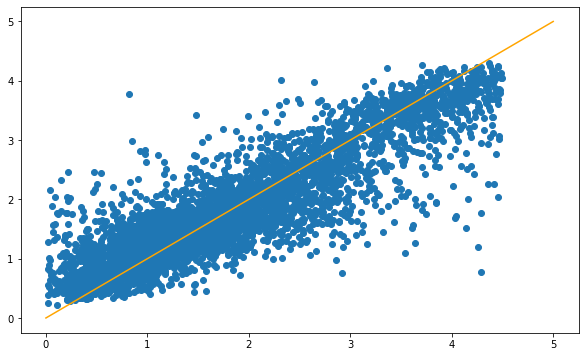

In [34]:
y_pred = scores_std[tuple(features_lists[-1])][0]
plt.scatter(test, y_pred)
plt.plot(np.linspace(0,5), np.linspace(0,5), c = 'orange')